In [75]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X = np.load('x_digits.npy')
y = np.load('y_digits.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
X.shape, y.shape # num_samples, height (frequency bins), width (time steps)

((35631, 129, 71), (35631,))

### Fully Connected NN

In [66]:
X_train_fc = X_train.reshape(X_train.shape[0], -1)
X_val_fc = X_val.reshape(X_val.shape[0], -1)
X_test_fc = X_test.reshape(X_test.shape[0], -1) 

X_train_fc.shape, X_val_fc.shape, X_test_fc.shape

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = (X_train_fc.shape[1],)))
model.add(tf.keras.layers.Dense(500, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(250, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 2)
optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay = 0.002)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
history = model.fit(X_train_fc, y_train, epochs = 30, validation_data=(X_val_fc, y_val), callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2431 - loss: 6.0287 - val_accuracy: 0.3113 - val_loss: 2.2009 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2955 - loss: 2.1255 - val_accuracy: 0.3750 - val_loss: 1.7647 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3274 - loss: 1.8833 - val_accuracy: 0.4089 - val_loss: 1.5591 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3601 - loss: 1.8139 - val_accuracy: 0.4341 - val_loss: 1.6012 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3909 - loss: 1.7332 - val_accuracy: 0.4615 - val_loss: 1.4946 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4054 - loss: 1.6692 - val_accuracy: 0.4747 - val_loss: 1.5112 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4228 - l

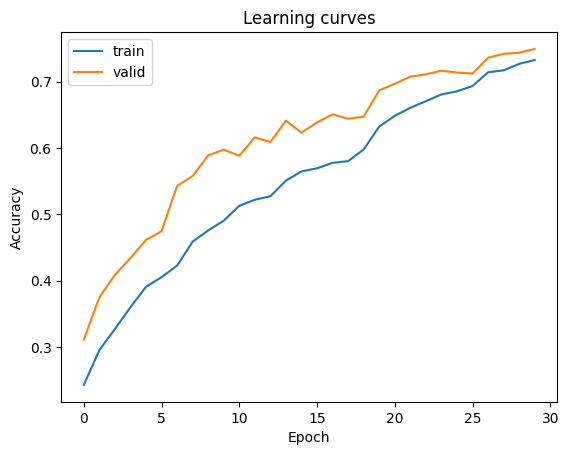

In [67]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

In [68]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train_fc, y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test_fc, y_test)))

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8169 - loss: 0.5619
Loss + accuracy on train data: [0.5618550181388855, 0.8169100284576416]
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7383 - loss: 0.7820
Loss + accuracy on test data: [0.7820127606391907, 0.7383190393447876]


### Convolutional

In [69]:
X_train_cnn = X_train[..., np.newaxis] # adds channel dimension
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(X_train_cnn[0].shape))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 2)
optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay = 0.002)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
history = model.fit(X_train_cnn, y_train, epochs = 30, validation_data=(X_val_cnn, y_val), callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6049 - loss: 1.9367 - val_accuracy: 0.8283 - val_loss: 0.5222 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.8481 - loss: 0.4590 - val_accuracy: 0.8739 - val_loss: 0.3961 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9069 - loss: 0.2780 - val_accuracy: 0.8844 - val_loss: 0.3661 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9358 - loss: 0.1909 - val_accuracy: 0.9005 - val_loss: 0.3502 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9444 - loss: 0.1645 - val_accuracy: 0.8921 - val_loss: 0.3750 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9562 - loss: 0.1314 - val_accuracy: 0.8932 - val_loss: 0.3990 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9760 - l

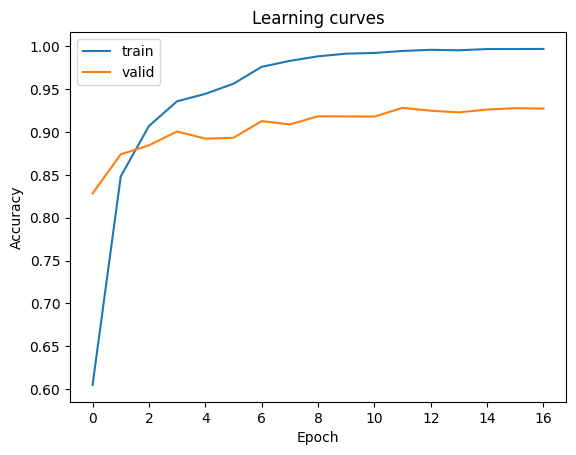

In [70]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

In [71]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train_cnn, y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test_cnn, y_test)))

713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9999 - loss: 9.4308e-04
Loss + accuracy on train data: [0.0009430785430595279, 0.9998684525489807]
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9197 - loss: 0.3675
Loss + accuracy on test data: [0.3674699068069458, 0.9197418093681335]


223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


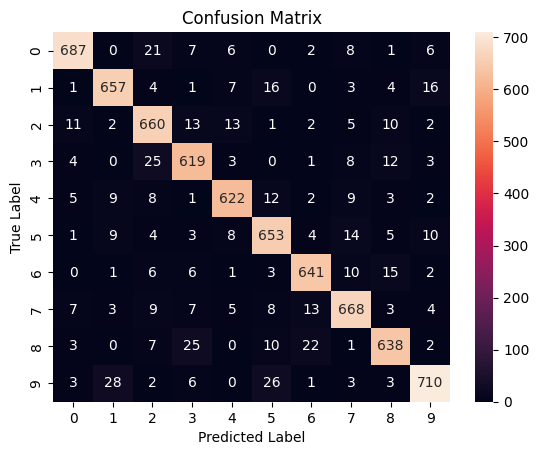

In [ ]:
y_pred_probs = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis = 1)